CHURN PREDICTION


In [119]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df =pd.read_csv('/Users/tanishagautam/Desktop/Churn_Modelling.csv')

In [122]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [124]:
df[df['Exited'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [125]:
df[df['IsActiveMember'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.5,0


In [126]:
df.drop(df[df['IsActiveMember'].isnull()].index,axis=0,inplace=True)

In [127]:
df.reset_index(inplace=True, drop=True)

In [128]:
df



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9997,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [129]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0
9,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10001 non-null  int64  
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [131]:
df[df['Age'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [132]:
df.loc[8,['Age']]=43

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10001 non-null  int64  
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [134]:
df[df['Geography'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.8,0


In [135]:
df.loc[6,['Geography']]='France'

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10001 non-null  int64  
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [137]:
df[df['HasCrCard'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.1,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10001 non-null  int64  
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [139]:
df.loc[4,['HasCrCard']]=1.0

In [140]:
df.loc[6,['HasCrCard']]=1.0

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10001 non-null  int64  
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10001.0,5.001999e+03,2887.185047,1.00,2502.00,5002.00,7502.00,10000.00
CustomerId,10001.0,1.569092e+07,71928.213659,15565701.00,15628523.00,15690731.00,15753215.00,15815690.00
CreditScore,10001.0,6.505700e+02,96.654877,350.00,584.00,652.00,718.00,850.00
Age,10001.0,3.892221e+01,10.487156,18.00,32.00,37.00,44.00,92.00
Tenure,10001.0,5.012599e+00,2.892100,0.00,3.00,5.00,7.00,10.00
Balance,10001.0,7.648456e+04,62393.149116,0.00,0.00,97188.62,127642.44,250898.09
NumOfProducts,10001.0,1.530147e+00,0.581649,1.00,1.00,1.00,2.00,4.00
HasCrCard,10001.0,7.056294e-01,0.455782,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10001.0,1.000858e+05,57510.443478,11.58,50974.57,100187.43,149384.43,199992.48


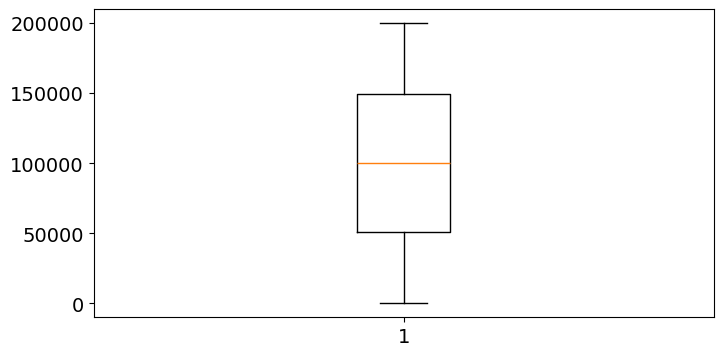

In [143]:
plt.figure(figsize=(8,4))
plt.boxplot(x=df['EstimatedSalary']);

In [144]:
salary = df['EstimatedSalary'].to_list()
Q1 = np.percentile(salary, 25, interpolation='midpoint')
Q3 = np.percentile(salary, 75, interpolation='midpoint')
IQR = Q3 - Q1
print("EstimatedSalary outliers; Min:", Q1 - 1.5 * IQR, "Max:", Q3 + 1.5 * IQR)

EstimatedSalary outliers; Min: -96640.21999999997 Max: 296999.22


In [145]:
outliers_salary = []
for i in salary:
    if i > Q3 + 1.5 * IQR or i < Q1 - 1.5 * IQR:
        outliers_salary.append(i)
outliers_salary


[]

In [146]:
df[df['EstimatedSalary'].isin(outliers_salary)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [147]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

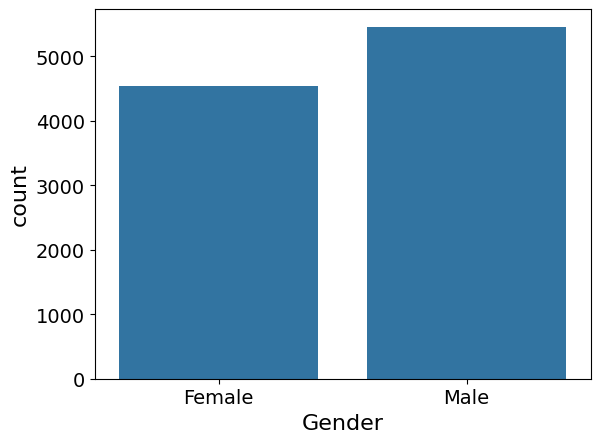

In [148]:
sns.countplot(data=df, x='Gender')
plt.show()

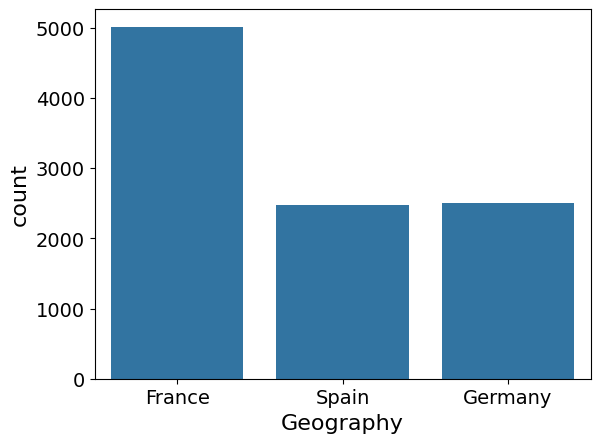

In [149]:
sns.countplot(data=df, x='Geography')
plt.show()

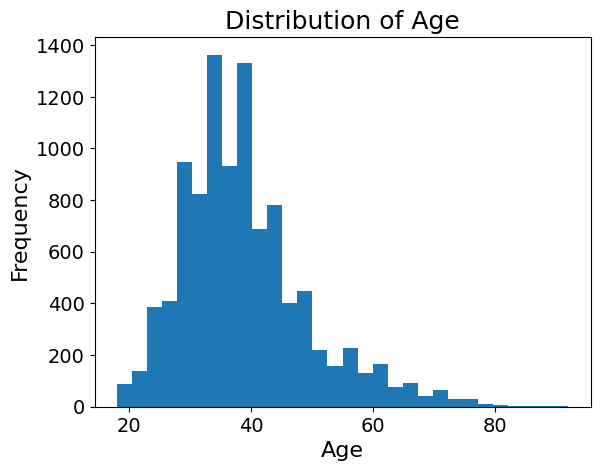

In [150]:
plt.hist(df['Age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

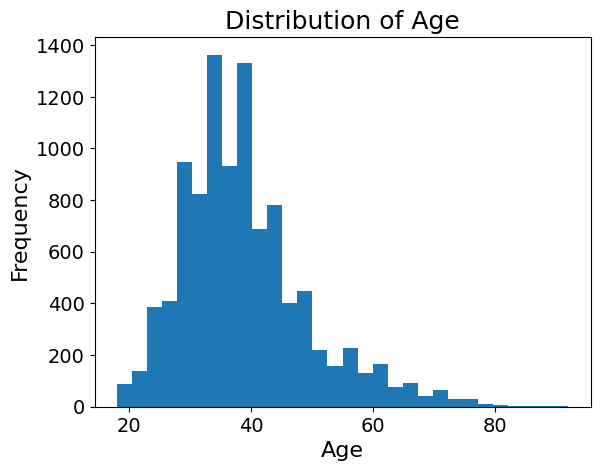

In [151]:
plt.hist(df['Age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

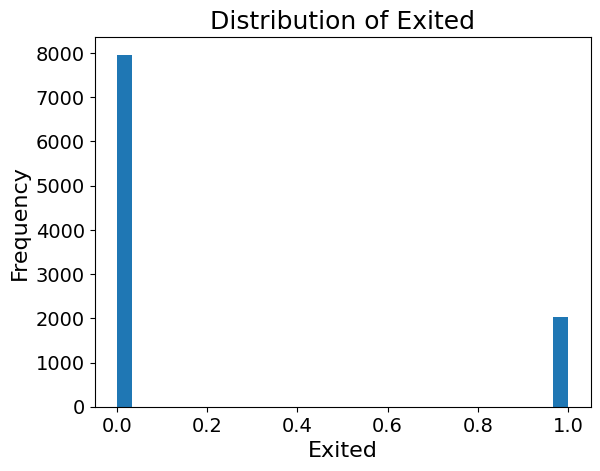

In [152]:
plt.hist(df['Exited'], bins=30)
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.show()

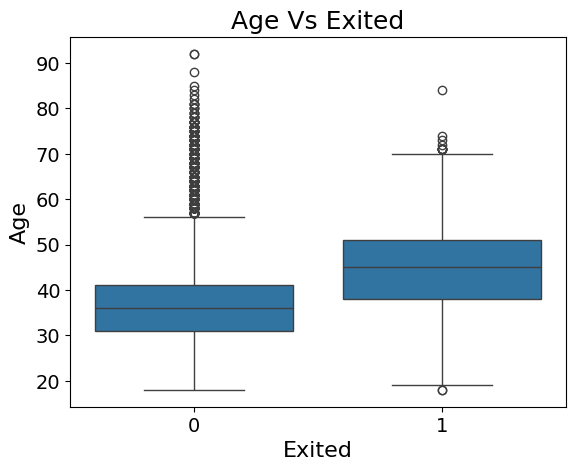

In [153]:
sns.boxplot(x='Exited', y='Age' ,data=df)
plt.title('Age Vs Exited')
plt.show()

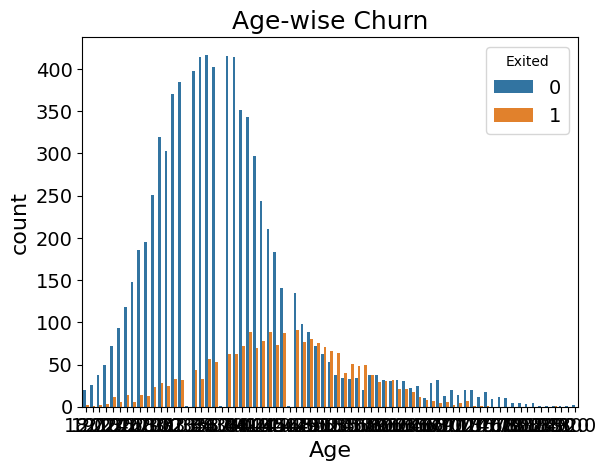

In [154]:
sns.countplot(data=df, x='Age', hue='Exited')
plt.title('Age-wise Churn')
plt.show()

In [155]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)


In [156]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [157]:
font_size = 15
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

In [158]:
colors = ['green', 'pink', 'red', 'cyan']

(0.0, 9000.0)

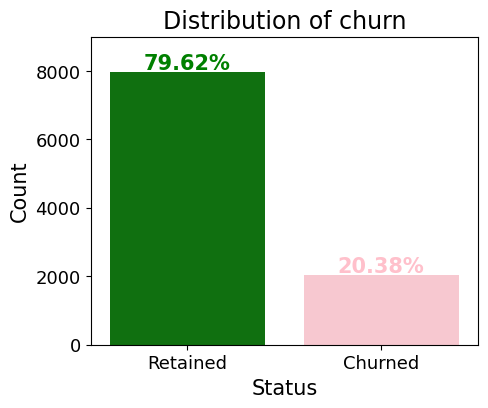

In [159]:
fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(x='Exited', data=df, palette=colors, ax=ax)

for index, value in enumerate(df['Exited'].value_counts()):
    label = '{}%'.format(round((value / df['Exited'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size=font_size )

ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of churn')
ax.set_ylim(0, 9000)

In [160]:
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


In [161]:
mulcols = ['Age','CreditScore','Balance','EstimatedSalary']

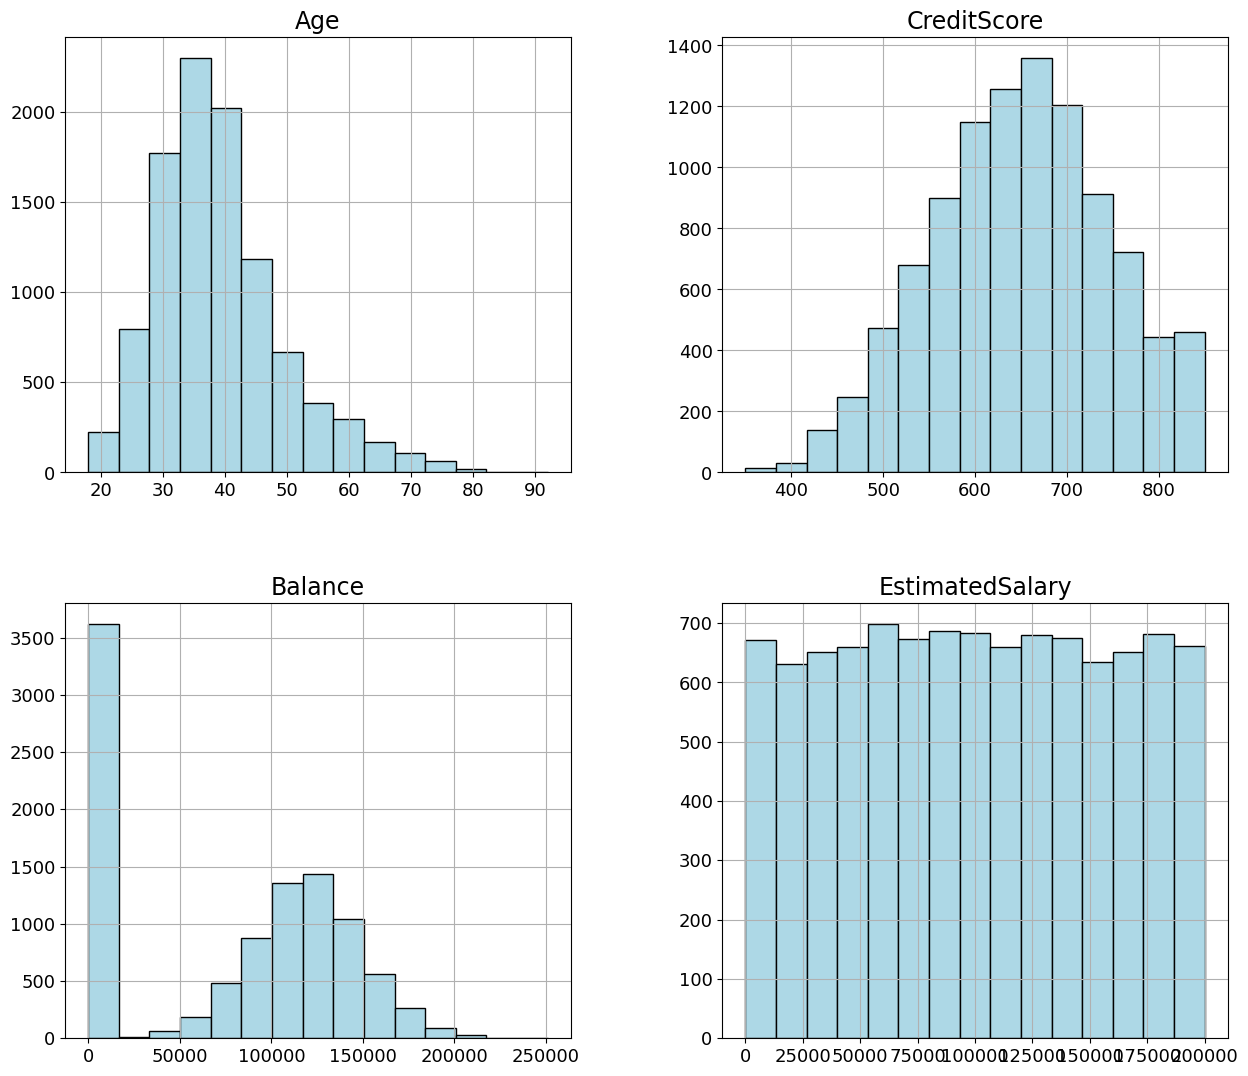

In [162]:
df[mulcols].hist(figsize=(15, 13),
                bins=15,
                layout=(2,2),
                color='lightblue',
                edgecolor='black',
                linewidth=1.0);

In [163]:
df[mulcols].corr()

,Age,CreditScore,Balance,EstimatedSalary
Age,1.000000,-0.003950,0.028307,-0.007137
CreditScore,-0.003950,1.000000,0.006554,-0.001625
Balance,0.028307,0.006554,1.000000,0.012751
EstimatedSalary,-0.007137,-0.001625,0.012751,1.000000


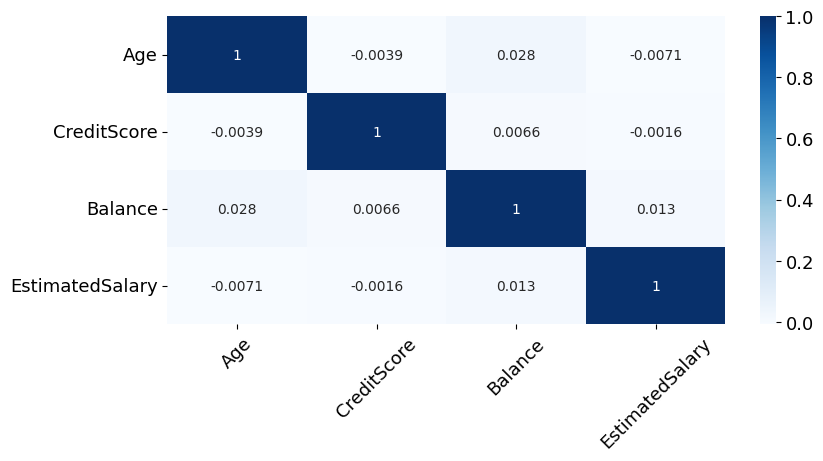

In [164]:
fig, ax = plt.subplots(figsize=(9, 4))

sns.heatmap(df[mulcols].corr(),
            annot=True,
            annot_kws={'fontsize': 10},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

In [165]:
def plot_continuous(df, feature):
    df_func = df.copy()
    df_func['Exited'] = df_func['Exited'].astype('category')
    
    df_churned = df_func[df_func['Exited'] == 1]
    df_retained = df_func[df_func['Exited'] == 0]
    
    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})
    
    colors = ['#1f77b4', '#ff7f0e']
    
    for sub_df, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=sub_df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.6,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()
    
    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])
    plt.tight_layout()
    plt.show()

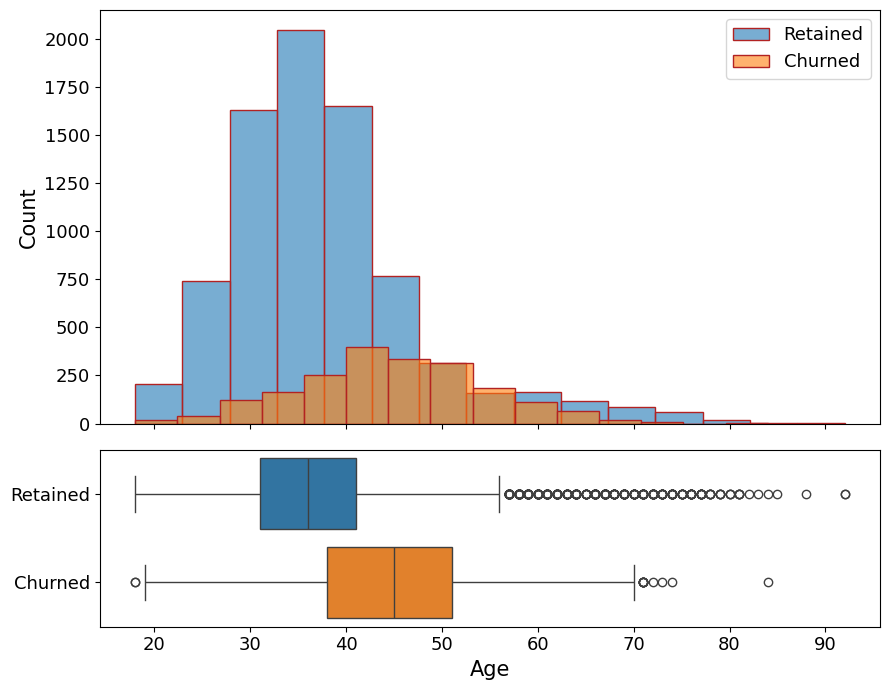

In [166]:
plot_continuous(df,'Age')

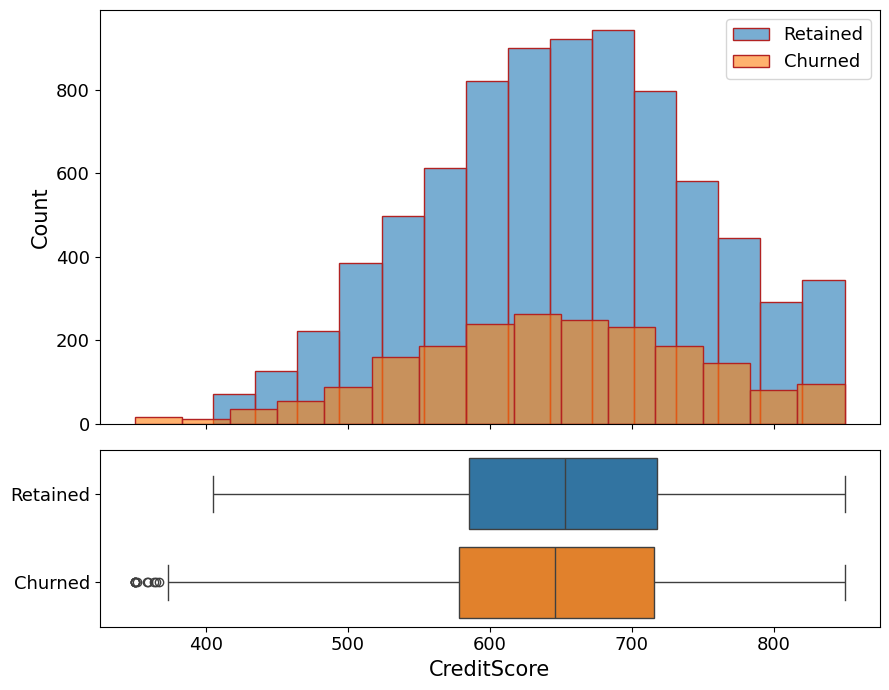

In [167]:
plot_continuous(df,'CreditScore')

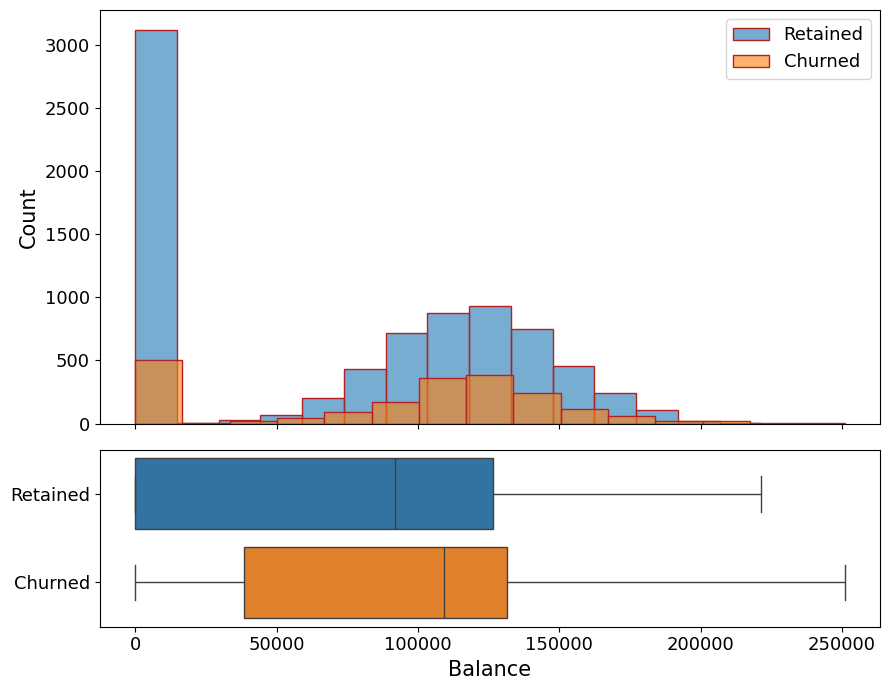

In [168]:
plot_continuous(df,'Balance')

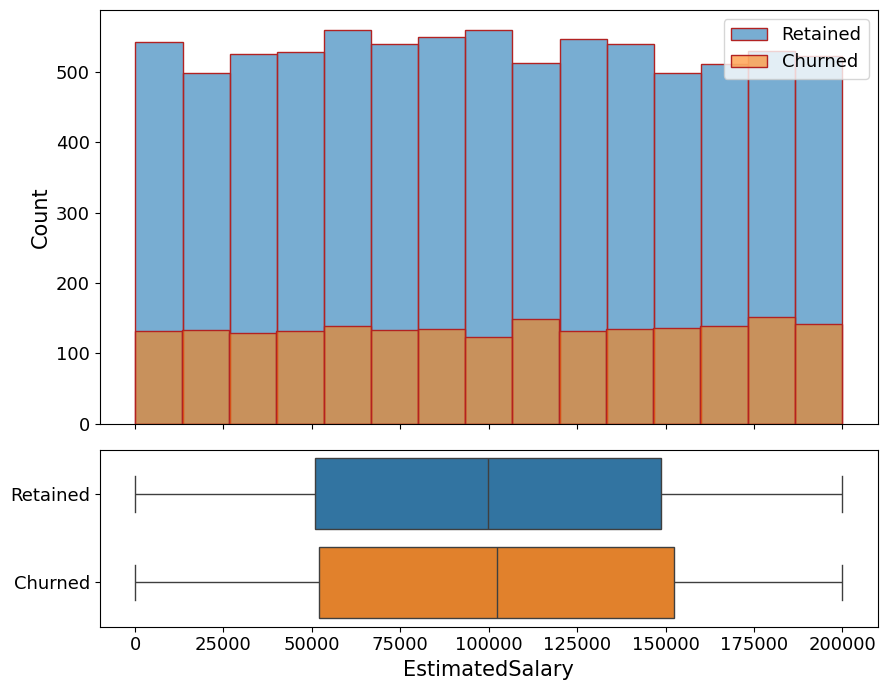

In [169]:
plot_continuous(df,'EstimatedSalary')

In [170]:
font_size = 16
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors_cat = ['cyan', 'steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey', 'red', 'yellow', 'pink']

In [171]:
categorical


['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

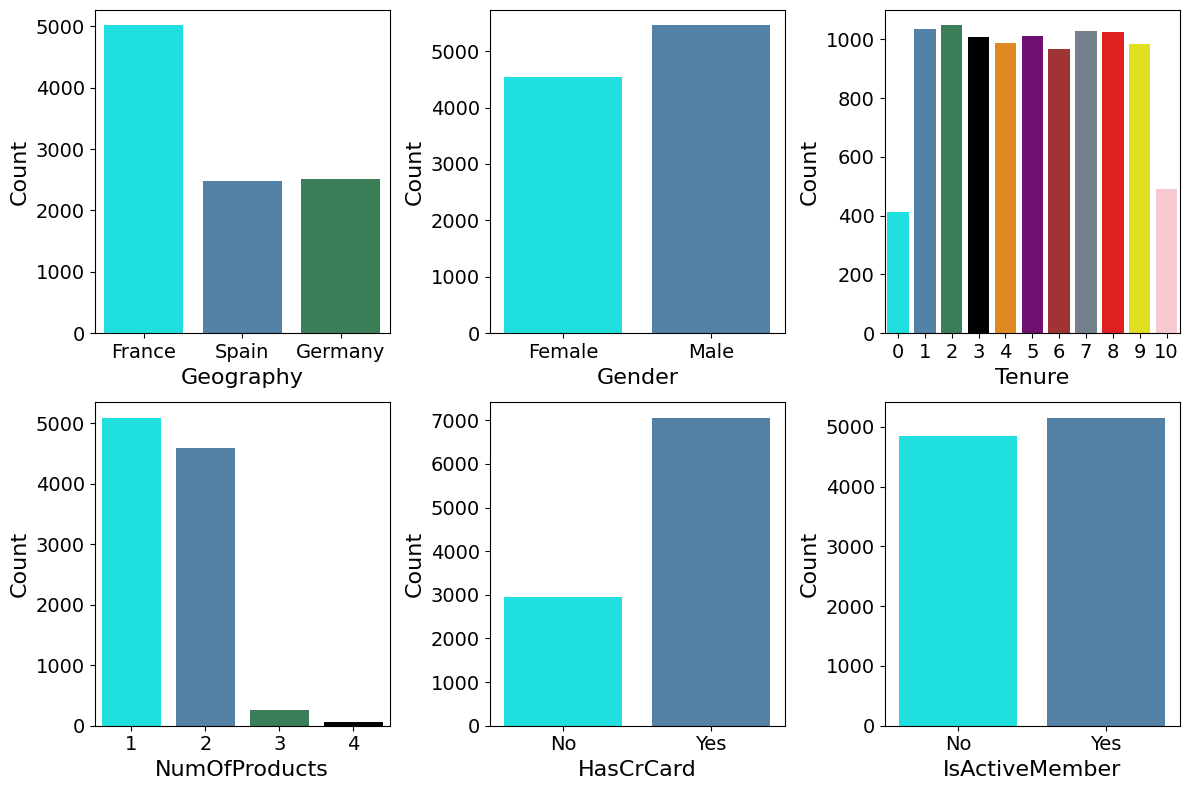

In [172]:
df_cat = df[categorical]
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):
    
    plt.subplot(2, 3, index + 1)
    sns.countplot(x=column, data=df, palette=colors_cat)
    
    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

In [173]:
feature_drop=['Tenure','HasCrCard','EstimatedSalary']

In [174]:
df=df.drop(feature_drop, axis=1);

In [175]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42.0,0.00,1,1.0,1
1,608,Spain,Female,41.0,83807.86,1,1.0,0
2,502,France,Female,42.0,159660.80,3,0.0,1
3,699,France,Female,39.0,0.00,2,0.0,0
4,850,Spain,Female,43.0,125510.82,1,1.0,0


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']), df['Exited'],
                                                    test_size=0.2, random_state=43, stratify=df['Exited'])

In [178]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 7), (8000,), (2001, 7), (2001,))

In [179]:
y_test.value_counts()

Exited
0    1593
1     408
Name: count, dtype: int64

In [180]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4544
Name: count, dtype: int64

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
le=LabelEncoder()


In [183]:
X_train['Gender'].value_counts()

Gender
Male      4383
Female    3617
Name: count, dtype: int64

In [184]:
X_train['Gender'] = le.fit_transform(X_train['Gender'])


In [185]:
X_test['Gender'] = le.transform(X_test['Gender'])

In [186]:
X_train['Gender'].value_counts()

Gender
1    4383
0    3617
Name: count, dtype: int64

In [187]:
def geography_conversion(df):
    df['Geography'] = df['Geography'].map({
        'Germany': 1,
        'Spain': 0,
        'France': 0
    })
    return df

In [188]:
X_train = geography_conversion(X_train)

In [189]:
X_train['Geography'].value_counts()

Geography
0    6004
1    1996
Name: count, dtype: int64

In [190]:
X_test['Geography'].value_counts()

Geography
France     983
Germany    514
Spain      504
Name: count, dtype: int64

In [191]:
X_test = geography_conversion(X_test)

In [192]:
X_test['Geography'].value_counts()

Geography
0    1487
1     514
Name: count, dtype: int64

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:

scaler = StandardScaler()
scl_columns = ['CreditScore', 'Age', 'Balance']
X_train[scl_columns] = scaler.fit_transform(X_train[scl_columns])
X_test[scl_columns] = scaler.transform(X_test[scl_columns])

In [195]:
X_test[scl_columns] = scaler.transform(X_test[scl_columns])

In [196]:
X_test.describe()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,-6.798376,0.256872,0.536732,-3.720652,-1.225899,1.531734,0.514243
std,0.010960,0.437017,0.498774,0.097737,0.000016,0.589167,0.499922
min,-6.831177,0.000000,0.000000,-3.914145,-1.225919,1.000000,0.000000
25%,-6.806065,0.000000,0.000000,-3.785776,-1.225919,1.000000,0.000000
50%,-6.798203,0.000000,1.000000,-3.730761,-1.225894,1.000000,1.000000
75%,-6.790888,1.000000,1.000000,-3.675745,-1.225886,2.000000,1.000000
max,-6.776584,1.000000,1.000000,-3.272300,-1.225864,4.000000,1.000000


In [197]:
from imblearn.over_sampling import SMOTE

In [198]:
over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [199]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [200]:
scoring_metric = 'accuracy'


In [201]:
clf_list = [('Logistic Regression', LogisticRegression(random_state=43))]

cv_base_mean, cv_std = [], []

for clf in clf_list:
    cv = cross_val_score(estimator=clf[1],
                        X=X_train,
                        y=y_train,
                        scoring=scoring_metric,
                        cv=5,
                        n_jobs=-1)
    
    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())
print('Baseline Models (Recall):')
for i in range(len(clf_list)):
    print('    {}: {}'.format(clf_list[i][0], np.round(cv_base_mean[i], 2)))

Baseline Models (Recall):
    Logistic Regression: 0.71


In [202]:
clf_list = [
    ('Logistic Regression', LogisticRegression(random_state=43)),
    ('Decision Tree', DecisionTreeClassifier(random_state=43)),
    ('Random Forest', RandomForestClassifier(random_state=43))
]

In [203]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, roc_auc_score


In [257]:
lr = LogisticRegression(random_state=43)

param_grid = {
    'max_iter': [100],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

lr_clf = GridSearchCV(estimator=lr,
                     param_grid=param_grid,
                     scoring=scoring_metric,
                     cv=5,
                     verbose=False,
                     n_jobs=-1)

best_lr_clf = lr_clf.fit(X_train, y_train)

In [258]:
best_lr_clf.best_estimator_

LogisticRegression(C=0.01, random_state=43, solver='liblinear')

In [259]:
lr_best = LogisticRegression(C=0.01, penalty='l1', random_state=43, solver='liblinear')

In [260]:
lr_best.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=43, solver='liblinear')

In [261]:
y_train_lr_pred= lr_best.predict(X_train)

In [262]:
print(classification_report(y_train, y_train_lr_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      6370
           1       0.72      0.69      0.71      6370

    accuracy                           0.71     12740
   macro avg       0.71      0.71      0.71     12740
weighted avg       0.71      0.71      0.71     12740



In [263]:
y_test_lr_pred= lr_best.predict(X_test)

In [211]:
print(classification_report(y_test, y_test_lr_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       408

    accuracy                           0.80      2001
   macro avg       0.40      0.50      0.44      2001
weighted avg       0.63      0.80      0.71      2001



In [212]:
!pip install xgboost lightgbm

In [213]:
!pip install xgboost

In [252]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [267]:

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 150],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [4, 5, 6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

rf_clf = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      scoring='f1',
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

# best_rf_clf = rf_clf.fit(X_train, y_train)

In [268]:
best_rf_clf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2)

In [269]:
best_rf_clf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [270]:
rfc =RandomForestClassifier(bootstrap = False, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=150)

In [271]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=150)

In [272]:
y_train_pred_rf = rfc.predict(X_train)

In [273]:
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      6370
           1       0.81      0.80      0.81      6370

    accuracy                           0.81     12740
   macro avg       0.81      0.81      0.81     12740
weighted avg       0.81      0.81      0.81     12740



In [274]:
y_test_pred_rf = rfc.predict(X_test)

In [275]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1593
           1       0.97      0.08      0.15       408

    accuracy                           0.81      2001
   macro avg       0.89      0.54      0.52      2001
weighted avg       0.84      0.81      0.74      2001



In [276]:
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [600],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3, 5, 7],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}

gbc_clf = GridSearchCV(estimator=gbc,
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

# best_gbc_clf = gbc_clf.fit(X_train, y_train)

In [277]:
best_gbc_clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 600,
 'n_iter_no_change': 20,
 'subsample': 0.66,
 'tol': 0.01,
 'validation_fraction': 0.2}

In [278]:
best_gbc_clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=600,
                           n_iter_no_change=20, subsample=0.66, tol=0.01,
                           validation_fraction=0.2)

In [279]:
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=7,
                                 min_samples_split=7, n_estimators=600,
                                 n_iter_no_change=20, subsample=0.75, tol=0.01,
                                 validation_fraction=0.2)

In [281]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=7,
                           min_samples_split=7, n_estimators=600,
                           n_iter_no_change=20, subsample=0.75, tol=0.01,
                           validation_fraction=0.2)

In [282]:
y_train_pred_gbc= gbc.predict(X_train)

In [283]:
print(classification_report(y_train, y_train_pred_gbc))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6370
           1       0.85      0.84      0.85      6370

    accuracy                           0.85     12740
   macro avg       0.85      0.85      0.85     12740
weighted avg       0.85      0.85      0.85     12740



In [284]:
y_test_pred_gbc= gbc.predict(X_test)

In [285]:
print(classification_report(y_test, y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1593
           1       0.92      0.15      0.26       408

    accuracy                           0.82      2001
   macro avg       0.87      0.57      0.58      2001
weighted avg       0.84      0.82      0.77      2001



Demonstrations to show accuracy of predictions using multiple models


In [286]:
from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))


Random Forest Accuracy: 0.8125937031484258

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1593
           1       0.97      0.08      0.15       408

    accuracy                           0.81      2001
   macro avg       0.89      0.54      0.52      2001
weighted avg       0.84      0.81      0.74      2001



In [287]:
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_test_pred_gbc))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_gbc))


Gradient Boosting Accuracy: 0.824087956021989

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1593
           1       0.92      0.15      0.26       408

    accuracy                           0.82      2001
   macro avg       0.87      0.57      0.58      2001
weighted avg       0.84      0.82      0.77      2001



In [288]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_test_lr_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_lr_pred))


Logistic Regression Accuracy: 0.7961019490254873

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       408

    accuracy                           0.80      2001
   macro avg       0.40      0.50      0.44      2001
weighted avg       0.63      0.80      0.71      2001

